In [25]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
back_orders=pd.read_csv('BackOrders.csv')
print(back_orders.shape)
back_orders.head()

(61589, 23)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1888279,117,NaN,0,0,0,0,0,0,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1,1870557,7,2.0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
2,1475481,258,15.0,10,10,77,184,46,132,256,...,0,0.54,0.70,0,No,No,No,Yes,No,No
3,1758220,46,2.0,0,0,0,0,1,2,6,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
4,1360312,2,2.0,0,4,6,10,2,2,5,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [5]:
#Pandas Profiling
profile = ProfileReport(back_orders, title='Back Orders Report', html={'style':{'full_width':True}})
profile.to_file(output_file="Back_Orders_Report.html")

In [3]:
def inspect_data(data):
    return pd.DataFrame({'Type': data.dtypes, 'Levels': data.apply(lambda x: x.unique().shape[0],axis=0),'Labels': data.apply(lambda x: str(x.unique()),  axis=0)})
print(back_orders.shape)
inspect_data(back_orders) 

(61589, 23)


,Type,Levels,Labels
sku,int64,61589,[1888279 1870557 1475481 ... 1909363 1845783 1...
national_inv,int64,2916,[117 7 258 ... 2701 6362 -84]
lead_time,float64,29,[nan 2.0 15.0 12.0 8.0 9.0 4.0 10.0 16.0 52.0 ...
in_transit_qty,int64,908,[0 10 562 11 812 1 40 3 9 24 5 7 285 6 145 104...
forecast_3_month,int64,1623,[0 10 4 ... 1206 1205 715]
forecast_6_month,int64,2195,[0 77 6 ... 1205 6830 1573]
forecast_9_month,int64,2664,[0 184 10 ... 976 12415 2431]
sales_1_month,int64,1092,[0 46 1 ... 2065 342 1796]
sales_3_month,int64,1928,[0 132 2 ... 792 6664 1715]
sales_6_month,int64,2679,[15 0 256 ... 11606 2252 3425]


In [4]:
#Use sku as index
back_orders.set_index('sku',inplace=True)

In [5]:
back_orders.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1888279,117,NaN,0,0,0,0,0,0,15,15,...,0,-99.00,-99.00,0,No,No,Yes,Yes,No,No
1870557,7,2.0,0,0,0,0,0,0,0,0,...,0,0.50,0.28,0,Yes,No,No,Yes,No,No
1475481,258,15.0,10,10,77,184,46,132,256,365,...,0,0.54,0.70,0,No,No,No,Yes,No,No
1758220,46,2.0,0,0,0,0,1,2,6,9,...,0,0.75,0.90,0,Yes,No,No,Yes,No,No
1360312,2,2.0,0,4,6,10,2,2,5,6,...,0,0.97,0.92,0,No,No,No,Yes,No,No


In [6]:
back_orders.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [7]:
back_orders.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [8]:
back_orders.loc[:, ['perf_6_month_avg','perf_12_month_avg']]=back_orders.loc[:, ['perf_6_month_avg','perf_12_month_avg']].replace(-99, np.nan)

In [9]:
back_orders.isnull().sum()

national_inv            0
lead_time            3403
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg     4341
perf_12_month_avg    4091
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [10]:
#Decoupling target
y=back_orders['went_on_backorder']
X=back_orders[back_orders.columns.difference(['went_on_backorder'])]

In [11]:
print(y.shape)
print(X.shape)

(61589,)
(61589, 21)


In [12]:
#Train test split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(43112, 21)
(18477, 21)
(43112,)
(18477,)


In [19]:
#Categorize numeric and categorical types
num_cols=back_orders.select_dtypes(include='number').columns
print(num_cols)
cat_cols=back_orders.columns.difference(num_cols)
print(cat_cols)

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg',
       'local_bo_qty'],
      dtype='object')
Index(['deck_risk', 'oe_constraint', 'potential_issue', 'ppap_risk',
       'rev_stop', 'stop_auto_buy', 'went_on_backorder'],
      dtype='object')


In [20]:
#Median imputation for num columns
median_imputer=SimpleImputer(strategy='median')
median_imputer.fit(X_train[num_cols])
X_train[num_cols]=median_imputer.transform(X_train[num_cols])
X_test[num_cols]=median_imputer.transform(X_test[num_cols])

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [21]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)
print(X_train.shape)
print(X_test.shape)

(43112, 27)
(18477, 27)


In [22]:
#alignment of dataframe ensuring same number of columns
X_train, X_test=X_train.align(X_test,join='left', fill_value=0,axis=1)
print(X_train.shape)
print(X_test.shape)

(43112, 27)
(18477, 27)


In [24]:
#Logistic regression
logistic=LogisticRegression(class_weight='balanced')
logistic.fit(X_train, y_train)
train_preds=logistic.predict(X_train)
test_preds=logistic.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [26]:
print(confusion_matrix(y_train, train_preds))
print(confusion_matrix(y_test, test_preds))

[[25792  9398]
 [  977  6945]]
[[11052  4054]
 [  407  2964]]


In [27]:
print('Train report')
print(classification_report(y_train, train_preds))
print('-------------------------')
print('Test report')
print(classification_report(y_test, test_preds))

Train report
              precision    recall  f1-score   support

          No       0.96      0.73      0.83     35190
         Yes       0.42      0.88      0.57      7922

    accuracy                           0.76     43112
   macro avg       0.69      0.80      0.70     43112
weighted avg       0.86      0.76      0.78     43112

-------------------------
Test report
              precision    recall  f1-score   support

          No       0.96      0.73      0.83     15106
         Yes       0.42      0.88      0.57      3371

    accuracy                           0.76     18477
   macro avg       0.69      0.81      0.70     18477
weighted avg       0.87      0.76      0.78     18477



In [34]:
#ROC curve
train_preds_prob=logistic.predict_proba(X_train)

In [43]:
yes_prob=train_preds_prob[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_train, yes_prob, pos_label="Yes")

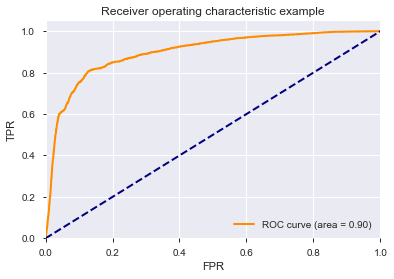

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [45]:
Threshold_df=pd.DataFrame({'TPR': tpr, 'FPR': fpr,'Threshold': thresholds})
Threshold_df

,TPR,FPR,Threshold
0,0.000000,0.000000,2.000000e+00
1,0.000631,0.000142,1.000000e+00
2,0.000757,0.000142,1.000000e+00
3,0.000757,0.000199,1.000000e+00
4,0.001010,0.000199,1.000000e+00
...,...,...,...
9090,1.000000,0.998210,2.046143e-97
9091,1.000000,0.999062,5.413044e-146
9092,1.000000,0.999119,2.619488e-153
9093,1.000000,0.999716,3.489232e-287


In [52]:
Threshold_df.loc[(Threshold_df['TPR'] > 0.8) & (Threshold_df['TPR'] < 0.801),:]

,TPR,FPR,Threshold
4253,0.800177,0.124723,0.506005
4254,0.800177,0.124837,0.506001
4255,0.800177,0.124893,0.506001
4256,0.800177,0.124950,0.505998
4257,0.800303,0.124950,0.505997
4258,0.800303,0.124979,0.505995
4259,0.800429,0.124979,0.505992
4260,0.800429,0.125036,0.505992
4261,0.800429,0.125064,0.505989
4262,0.800682,0.125064,0.505987


In [55]:
pd.Series(yes_prob).apply(lambda x: "yes" if x>0.5 else "no")

0         no
1         no
2         no
3         no
4         no
        ... 
43107     no
43108     no
43109     no
43110     no
43111    yes
Length: 43112, dtype: object